# 📐 Linear SVC (Support Vector Classifier) — HireReady 2.0

## Model Overview
Linear SVC is a **classification model** based on Support Vector Machines. Since readiness scores are continuous (0-100), we bin them into **3 placement categories** for classification.

### Categories:
| Category | Score Range | Label |
|----------|-------------|-------|
| Needs Improvement | 0 – 49 | 0 |
| Almost Ready | 50 – 74 | 1 |
| Placement Ready | 75 – 100 | 2 |

### Key Characteristics:
- **Type**: Linear Classifier (SVM)
- **Strengths**: Fast training, works well for linearly separable data
- **Limitation**: Cannot predict continuous scores — only categories

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='viridis')
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['font.size'] = 12
print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load Training Data (50,000 Student Profiles)

In [2]:
# Load the 50K synthetic student profiles
df = pd.read_csv("training_data.csv")
print(f"Dataset: {len(df):,} rows x {len(df.columns)} columns")
print(f"Score range: [{df['readiness_score'].min():.1f}, {df['readiness_score'].max():.1f}]")
print(f"Mean: {df['readiness_score'].mean():.1f} | Median: {df['readiness_score'].median():.1f}")
df['readiness_score'].describe().round(2)

Dataset: 50,000 rows x 65 columns
Score range: [1.2, 100.0]
Mean: 61.8 | Median: 61.5


count    50000.00
mean        61.78
std         25.10
min          1.24
25%         43.31
50%         61.50
75%         82.74
max        100.00
Name: readiness_score, dtype: float64

## 2. Feature Columns (64 Features)

In [3]:
FEATURE_COLUMNS = [
    "Python","Java","C++","C","JavaScript","Go","Rust","TypeScript",
    "SQL","Node","Spring","Django","Flask","FastAPI","Express",
    "React","Angular","Vue","NextJS","HTML","CSS","TensorFlow","PyTorch",
    "AWS","Azure","GCP","Docker","Kubernetes","CI/CD",
    "Scikit","Pandas","NLP","ComputerVision","LLM","PromptEngineering",
    "EthicalHacking","Cryptography","NetworkSecurity",
    "Android","Flutter","ReactNative","OOPS","SystemDesign","DBMS","OS",
    "internship_backend","internship_ai","internship_cloud",
    "internship_security","internship_mobile","internship_data",
    "num_backend_projects","num_ai_projects","num_mobile_projects",
    "num_cloud_projects","num_security_projects",
    "github_total_repos","github_total_commits","open_source_contribution_score",
    "leetcode_easy","leetcode_medium","leetcode_hard",
    "leetcode_total","leetcode_contest_rating",
]
print(f"Total features: {len(FEATURE_COLUMNS)}")

Total features: 64


## 3. Data Preprocessing — Bin Scores into Categories

Category Distribution:
  Needs Improvement   : 16,068 (32.1%)
  Almost Ready        : 15,151 (30.3%)
  Placement Ready     : 18,781 (37.6%)


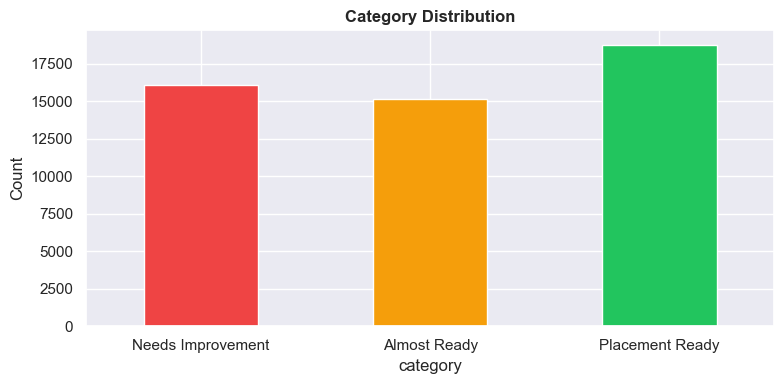

In [4]:
# Bin continuous scores into 3 categories for classification
def categorize_score(score):
    if score >= 75:
        return 2  # Placement Ready
    elif score >= 50:
        return 1  # Almost Ready
    else:
        return 0  # Needs Improvement

df['category'] = df['readiness_score'].apply(categorize_score)

category_names = {0: 'Needs Improvement', 1: 'Almost Ready', 2: 'Placement Ready'}
print("Category Distribution:")
for cat, count in df['category'].value_counts().sort_index().items():
    pct = count / len(df) * 100
    print(f"  {category_names[cat]:20s}: {count:,} ({pct:.1f}%)")

# Visualize
fig, ax = plt.subplots(figsize=(8, 4))
colors = ['#ef4444', '#f59e0b', '#22c55e']
df['category'].value_counts().sort_index().plot(kind='bar', color=colors, ax=ax, edgecolor='white')
ax.set_xticklabels(['Needs Improvement', 'Almost Ready', 'Placement Ready'], rotation=0)
ax.set_title('Category Distribution', fontweight='bold')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

## 4. Train-Test Split (80/20)

In [5]:
X = df[FEATURE_COLUMNS]
y = df['category']  # Classification target (0, 1, 2)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training: {X_train.shape[0]:,} | Test: {X_test.shape[0]:,} | Features: {X_train.shape[1]}")

Training: 40,000 | Test: 10,000 | Features: 64


## 5. Feature Scaling
Linear SVC requires **standardized features** (zero mean, unit variance) for optimal performance.

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Feature scaling applied!")

Feature scaling applied!


## 6. Train Linear SVC Model

In [7]:
model = LinearSVC(
    C=1.0,
    max_iter=5000,
    random_state=42,
)

print("Training Linear SVC...")
model.fit(X_train_scaled, y_train)
print("Training complete!")

Training Linear SVC...


Training complete!


## 7. Evaluation

In [8]:
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print("=" * 50)
print("  LINEAR SVC — EVALUATION RESULTS")
print("=" * 50)
print(f"  Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print("=" * 50)

print("\nClassification Report:")
target_names = ['Needs Improvement', 'Almost Ready', 'Placement Ready']
print(classification_report(y_test, y_pred, target_names=target_names))

  LINEAR SVC — EVALUATION RESULTS
  Accuracy: 0.9191 (91.91%)

Classification Report:
                   precision    recall  f1-score   support

Needs Improvement       0.94      0.96      0.95      3214
     Almost Ready       0.91      0.82      0.86      3030
  Placement Ready       0.91      0.97      0.94      3756

         accuracy                           0.92     10000
        macro avg       0.92      0.91      0.92     10000
     weighted avg       0.92      0.92      0.92     10000



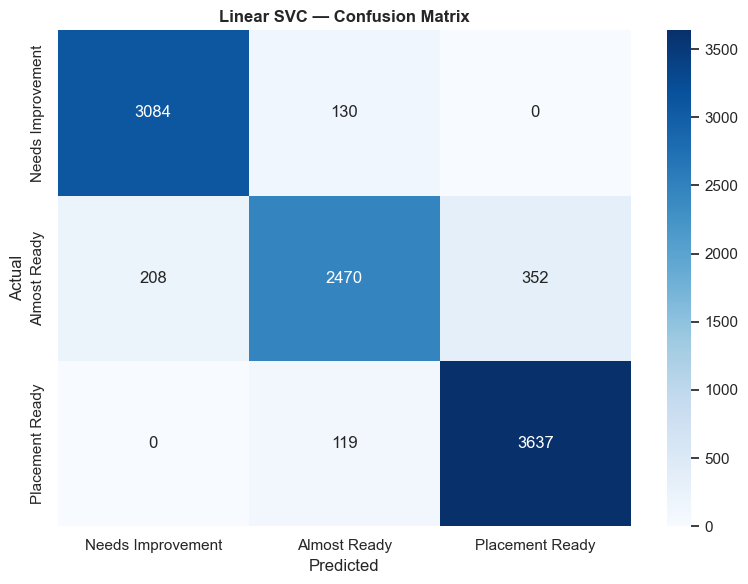

In [9]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=['Needs Improvement', 'Almost Ready', 'Placement Ready'],
            yticklabels=['Needs Improvement', 'Almost Ready', 'Placement Ready'])
ax.set_title('Linear SVC — Confusion Matrix', fontweight='bold')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()

## 8. Limitation Analysis

### Why Linear SVC is not ideal for this problem:

| Aspect | Regression (XGBoost) | Classification (Linear SVC) |
|--------|---------------------|----------------------------|
| Output | Exact score (0-100) | Category only (3 classes) |
| Granularity | High (e.g., 72.5 vs 73.1) | Low (only 3 buckets) |
| Boundary errors | No hard boundaries | Misclassifies near boundaries |
| Score ranking | Can rank all students | Cannot distinguish within category |

Linear SVC can only classify students into 3 broad categories but **cannot provide the precise readiness score** needed for ranking and detailed feedback.

## 9. Conclusion

Linear SVC achieves reasonable classification accuracy but is **not suitable** for this problem because:

1. **Loss of granularity** — Binning the continuous score into 3 categories loses critical information
2. **Boundary misclassification** — Students near category boundaries (e.g., score 49 vs 51) are often misclassified
3. **No score ranking** — Cannot distinguish between students within the same category
4. **Linear assumption** — The relationship between features and readiness is non-linear

**Recommendation**: Use **XGBoost Regressor** for continuous score prediction, which achieves better accuracy and provides the full 0-100 readiness score.